In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import linear_model
import seaborn as sns
%matplotlib inline 

In [30]:
df = pd.read_csv("crop_yield.csv", header=0)
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [31]:
df.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')

In [32]:
df.info() #no null values are found in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [33]:
df.describe(include='all') #statistical analysis

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689,19689.000000,19689,19689,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
unique,55,NaN,6,30,NaN,NaN,NaN,NaN,NaN,NaN
top,Rice,NaN,Kharif,Karnataka,NaN,NaN,NaN,NaN,NaN,NaN
freq,1197,NaN,8232,1432,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2009.127584,NaN,NaN,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,NaN,6.498099,NaN,NaN,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,NaN,1997.000000,NaN,NaN,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,NaN,2004.000000,NaN,NaN,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,NaN,2010.000000,NaN,NaN,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,NaN,2015.000000,NaN,NaN,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889


In [34]:
# normalizing data
# df['Production'] = df['Production']/df['Production'].max()
# df.head()

In [35]:
# Finding the correlation
test = df[['Yield','Annual_Rainfall','Fertilizer','Pesticide']]
test.corr()

,Yield,Annual_Rainfall,Fertilizer,Pesticide
Yield,1.000000,0.020761,0.002862,0.001782
Annual_Rainfall,0.020761,1.000000,-0.109734,-0.097657
Fertilizer,0.002862,-0.109734,1.000000,0.954991
Pesticide,0.001782,-0.097657,0.954991,1.000000


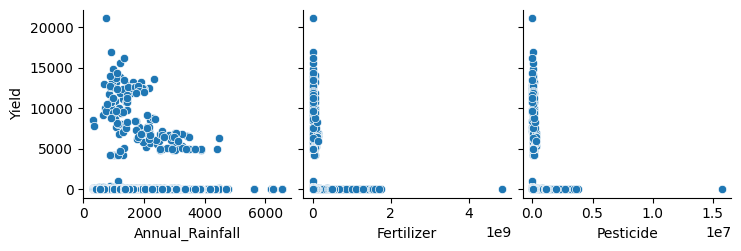

In [80]:
sns.pairplot(data=df, x_vars=['Annual_Rainfall','Fertilizer','Pesticide'], y_vars=['Yield'])

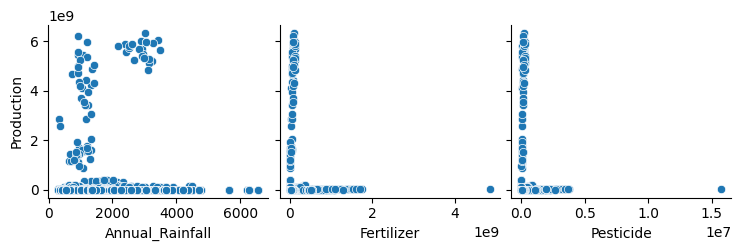

In [81]:
sns.pairplot(data=df, x_vars=['Annual_Rainfall','Fertilizer','Pesticide'], y_vars=['Production'])

<Axes: xlabel='Crop', ylabel='Crop_Year'>

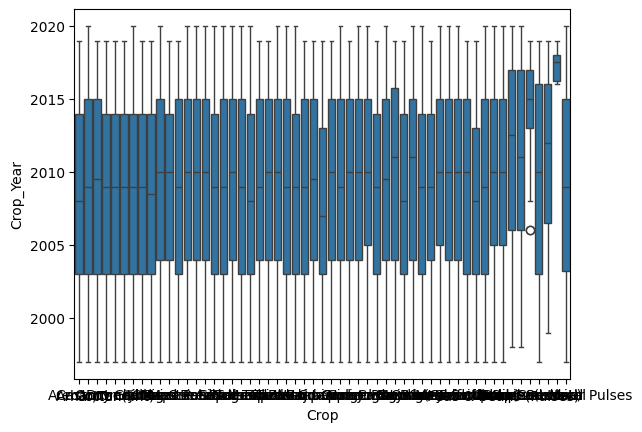

In [37]:
# Box plots
sns.boxplot(x="Crop", y="Crop_Year", data=df)

In [38]:
crop_production = df.groupby('Crop')['Production'].sum().reset_index()
sorted_crop_production = crop_production.sort_values(by='Production', ascending=False)

top_10_crops = sorted_crop_production.head(10)
top_10_crops['Crop']


9         Coconut 
46       Sugarcane
40            Rice
53           Wheat
37          Potato
11    Cotton(lint)
24           Maize
21            Jute
3           Banana
45        Soyabean
Name: Crop, dtype: object

In [39]:
crop_year_production = df.groupby(['Crop', 'Crop_Year'])['Production'].sum().reset_index()
top_11_crops = df.groupby('Crop')['Production'].sum().nlargest(11).index
filtered_data = crop_year_production[crop_year_production['Crop'].isin(top_10_crops)]


print(crop_year_production)
# print(top_11_crops)
# print(filtered_data)

                Crop  Crop_Year  Production
0           Arecanut       1997      308584
1           Arecanut       1998      799274
2           Arecanut       1999      163905
3           Arecanut       2000      348215
4           Arecanut       2001      369214
...              ...        ...         ...
1255  other oilseeds       2016        5118
1256  other oilseeds       2017     1787278
1257  other oilseeds       2018     1973742
1258  other oilseeds       2019     2289394
1259  other oilseeds       2020          30

[1260 rows x 3 columns]


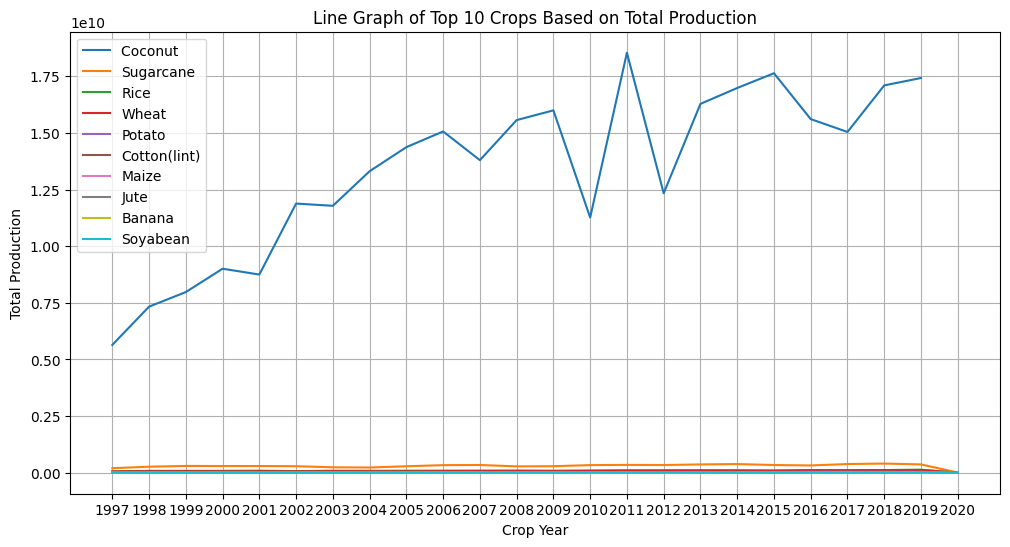

In [40]:
# Top 10 crops produced from 1997 to 2020

years = list(range(1997, 2021))
label = list(map(str, range(1997, 2021)))
crop_year_production = df.groupby(['Crop', 'Crop_Year'])['Production'].sum().reset_index()
top_10_crops = df.groupby('Crop')['Production'].sum().nlargest(10).index
filtered_data = crop_year_production[crop_year_production['Crop'].isin(top_10_crops)]

# Plot the time series line graph for each crop
plt.figure(figsize=(12, 6))
for crop in top_10_crops:
    crop_data = filtered_data[filtered_data['Crop'] == crop]
    plt.plot(crop_data['Crop_Year'], crop_data['Production'], label=crop)

# Set plot labels and title
plt.xlabel('Crop Year')
plt.xticks(years, label=label)
plt.ylabel('Total Production')
plt.title('Line Graph of Top 10 Crops Based on Total Production')
plt.legend()
plt.grid(True)
plt.show()

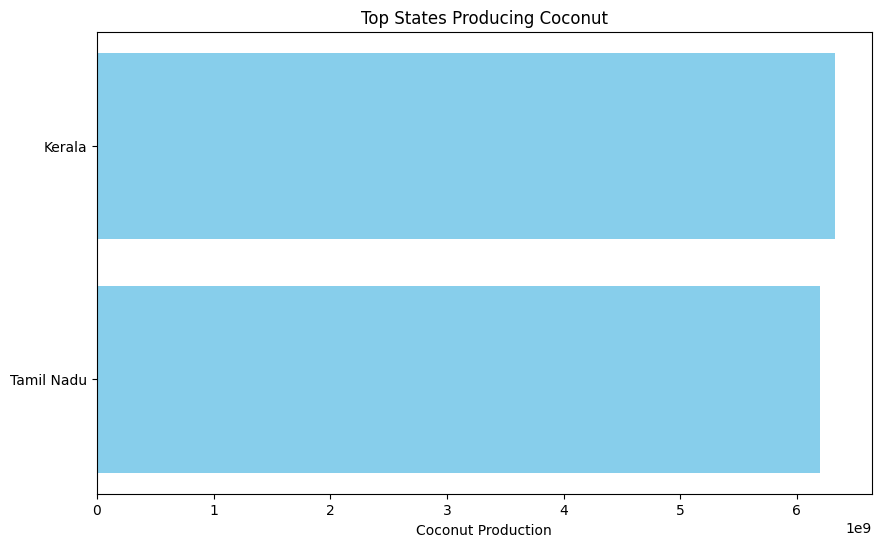

In [41]:
# Top 10 states that are producing Coconut

top10_coconut_states = df.sort_values(by='Production', ascending=False).head(10)
# top10_coconut_states

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top10_coconut_states['State'], top10_coconut_states['Production'], color='skyblue')
plt.xlabel('Coconut Production')
plt.title('Top States Producing Coconut')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest production at the top
plt.show()

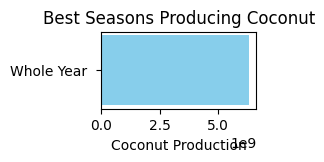

In [42]:
# best seasons for producing coconut

top_coconut_seasons = df.sort_values(by='Production', ascending=False).head()
top_coconut_seasons

# Plotting the horizontal bar chart
plt.figure(figsize=(2, 1))
plt.barh(top_coconut_seasons['Season'], top_coconut_seasons['Production'], color='skyblue')
plt.xlabel('Coconut Production')
plt.title('Best Seasons Producing Coconut')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest production at the top
plt.show()

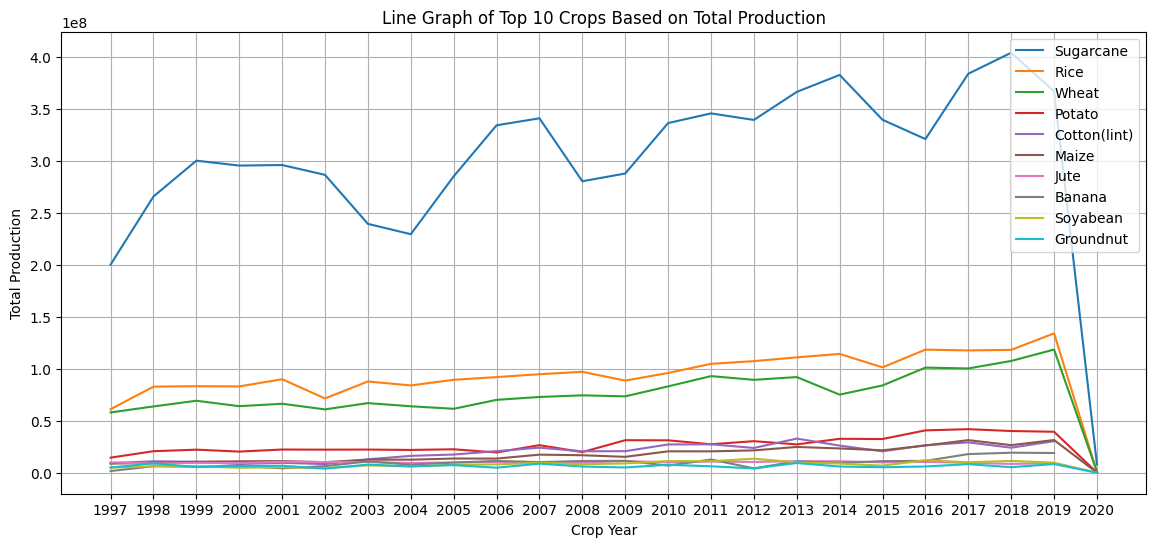

In [43]:
# Top 10 crops produced after Coconut 

years = list(range(1997, 2021))
label = list(map(str, range(1997, 2021)))
crop_year_production = df.groupby(['Crop', 'Crop_Year'])['Production'].sum().reset_index()
top_11_crops = df.groupby('Crop')['Production'].sum().nlargest(11).index
top_10_crops = top_11_crops.drop('Coconut ')
filtered_data = crop_year_production[crop_year_production['Crop'].isin(top_10_crops)]

plt.figure(figsize=(14, 6))
for crop in top_10_crops:
    crop_data = filtered_data[filtered_data['Crop'] == crop]
    plt.plot(crop_data['Crop_Year'], crop_data['Production'], label=crop)

plt.xlabel('Crop Year')
plt.xticks(years, label=label)
plt.ylabel('Total Production')
plt.title('Line Graph of Top 10 Crops Based on Total Production')
plt.legend()
plt.grid(True)
plt.show()

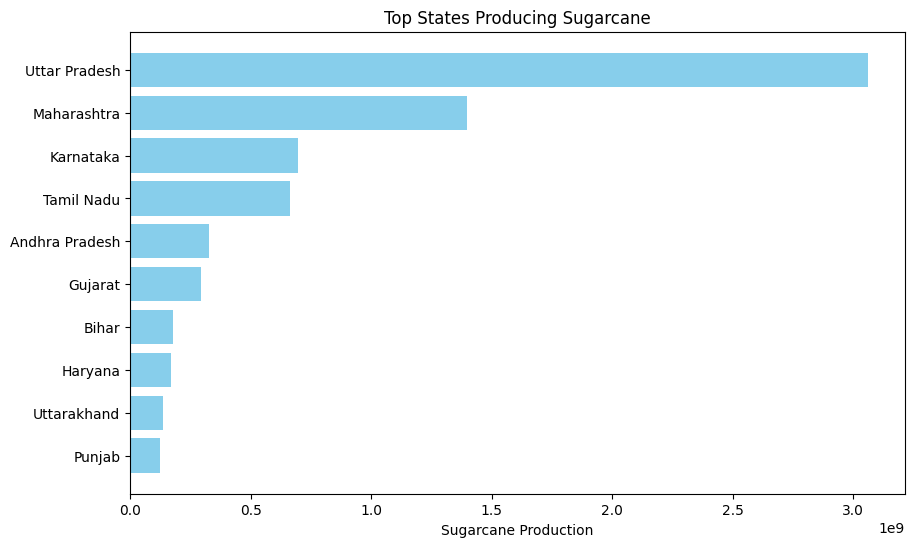

In [44]:
# Top 10 states that are producing Sugarcane

crop_state_production = df.groupby(['Crop', 'State'])['Production'].sum().reset_index()
top10_sugarcane_states = crop_state_production[crop_state_production['Crop'] == 'Sugarcane'].sort_values(by='Production', ascending=False).head(10)
top10_sugarcane_states

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top10_sugarcane_states['State'], top10_sugarcane_states['Production'], color='skyblue')
plt.xlabel('Sugarcane Production')
plt.title('Top States Producing Sugarcane')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest production at the top
plt.show()

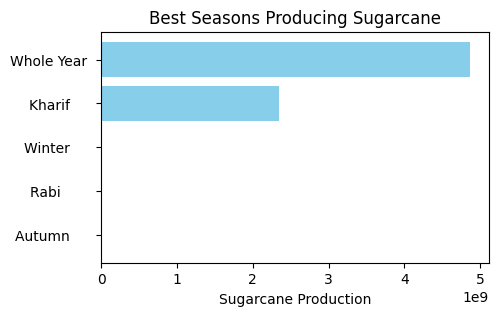

In [45]:
# best seasons for producing sugarcane

crop_state_production = df.groupby(['Crop', 'Season'])['Production'].sum().reset_index()
top_sugarcane_seasons = crop_state_production[crop_state_production['Crop'] == 'Sugarcane'].sort_values(by='Production', ascending=False).head()
top_sugarcane_seasons

# Plotting the horizontal bar chart
plt.figure(figsize=(5, 3))
plt.barh(top_sugarcane_seasons['Season'], top_sugarcane_seasons['Production'], color='skyblue')
plt.xlabel('Sugarcane Production')
plt.title('Best Seasons Producing Sugarcane')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest production at the top
plt.show()

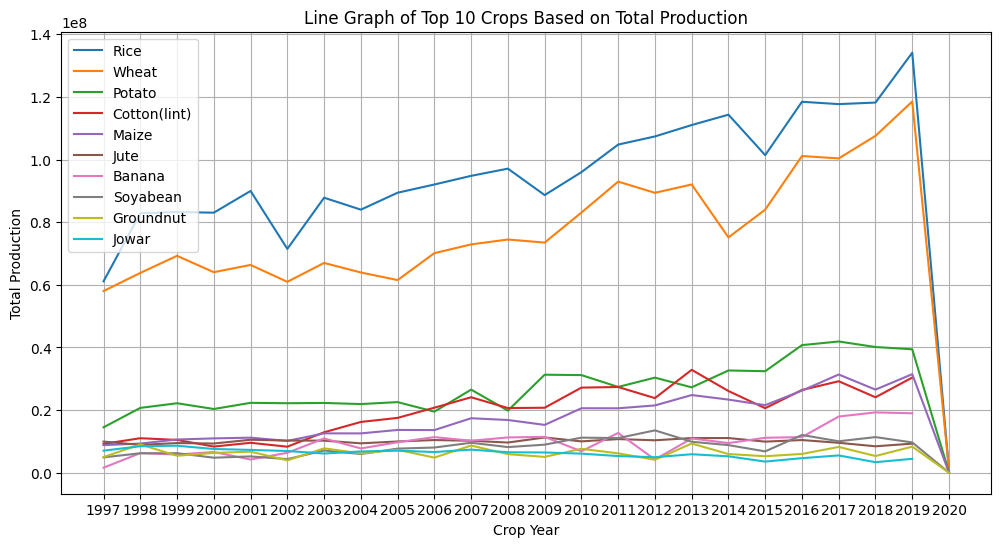

In [46]:
# Top 10 crops produced after Sugarcane

years = list(range(1997, 2021))
label = list(map(str, range(1997, 2021)))
crop_year_production = df.groupby(['Crop', 'Crop_Year'])['Production'].sum().reset_index()
top_12_crops = df.groupby('Crop')['Production'].sum().nlargest(12).index
top_11_crops = top_12_crops.drop('Coconut ')
top_10_crops = top_11_crops.drop('Sugarcane')
filtered_data = crop_year_production[crop_year_production['Crop'].isin(top_10_crops)]

plt.figure(figsize=(12, 6))
for crop in top_10_crops:
    crop_data = filtered_data[filtered_data['Crop'] == crop]
    plt.plot(crop_data['Crop_Year'], crop_data['Production'], label=crop)

plt.xlabel('Crop Year')
plt.xticks(years, label=label)
plt.ylabel('Total Production')
plt.title('Line Graph of Top 10 Crops Based on Total Production')
plt.legend()
plt.grid(True)
plt.show()

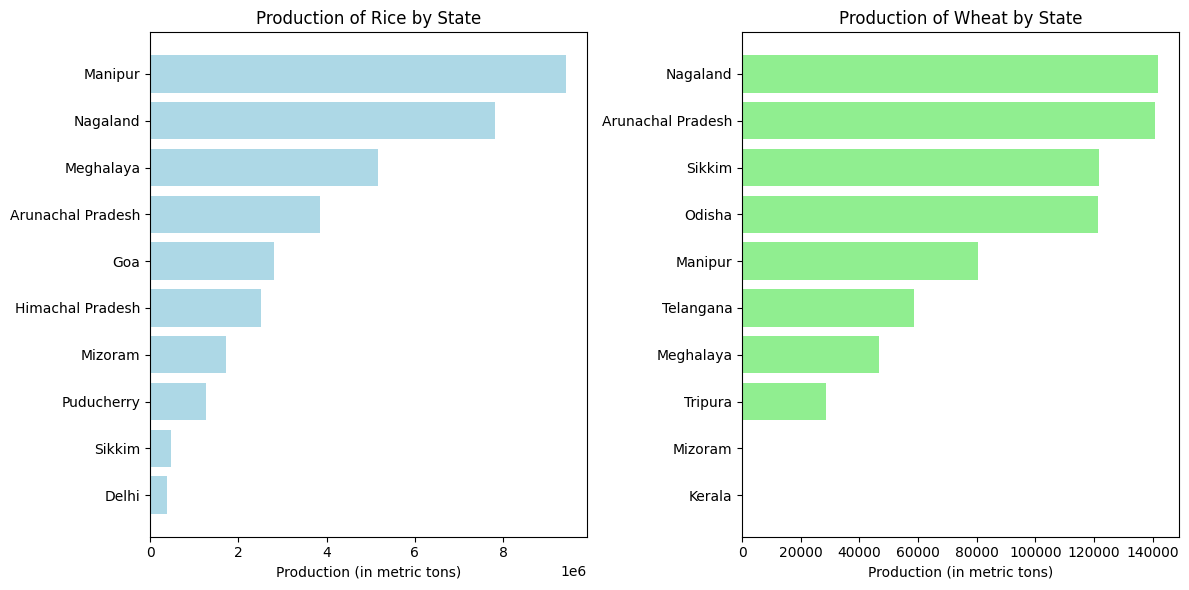

In [47]:
# Top States PRoducing Rice and Wheat

crop_state_production = df.groupby(['Crop', 'State'])['Production'].sum().reset_index()

# Filter DataFrame for 'Rice' and 'Wheat'
rice_df = crop_state_production[crop_state_production['Crop'] == 'Rice'].sort_values(by='Production', ascending=True).head(10)
wheat_df = crop_state_production[crop_state_production['Crop'] == 'Wheat'].sort_values(by='Production', ascending=True).head(10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Rice
ax1.barh(rice_df['State'], rice_df['Production'], color='lightblue')
ax1.set_xlabel('Production (in metric tons)')
ax1.set_title('Production of Rice by State')

# Wheat
ax2.barh(wheat_df['State'], wheat_df['Production'], color='lightgreen')
ax2.set_xlabel('Production (in metric tons)')
ax2.set_title('Production of Wheat by State')

plt.tight_layout()
plt.show()

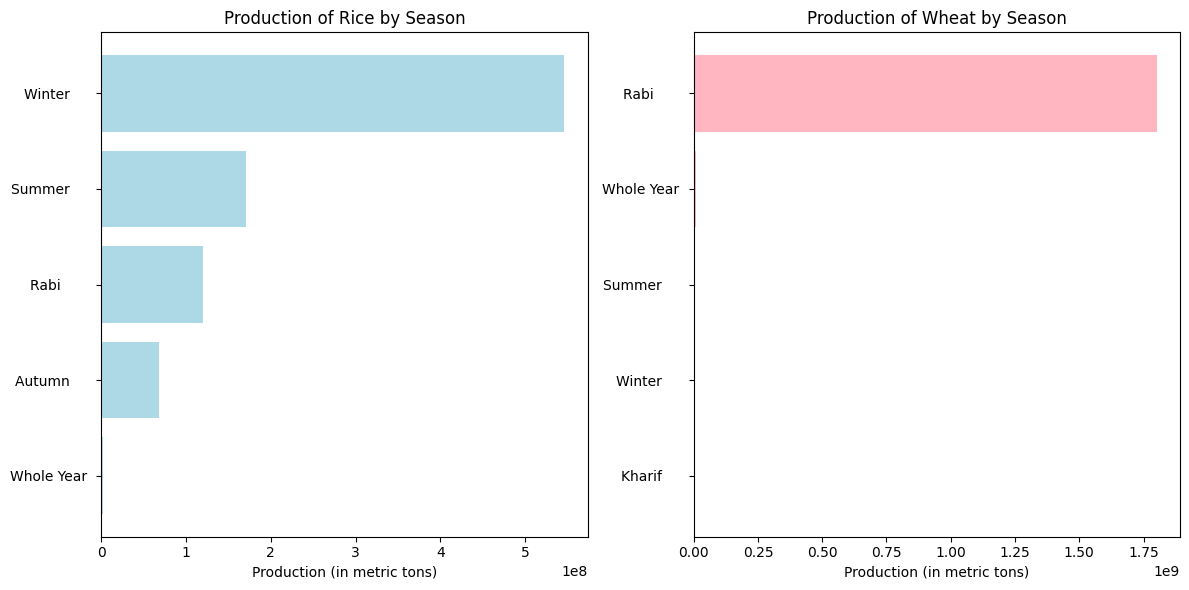

In [48]:
# best seasons for producing Rice and Wheat

crop_state_production = df.groupby(['Crop', 'Season'])['Production'].sum().reset_index()

top_rice_seasons = crop_state_production[crop_state_production['Crop'] == 'Rice'].sort_values(by='Production', ascending=True).head()
top_wheat_seasons = crop_state_production[crop_state_production['Crop'] == 'Wheat'].sort_values(by='Production', ascending=True).head()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Rice
ax1.barh(top_rice_seasons['Season'], top_rice_seasons['Production'], color='lightblue')
ax1.set_xlabel('Production (in metric tons)')
ax1.set_title('Production of Rice by Season')

# Wheat
ax2.barh(top_wheat_seasons['Season'], top_wheat_seasons['Production'], color='lightpink')
ax2.set_xlabel('Production (in metric tons)')
ax2.set_title('Production of Wheat by Season')

plt.tight_layout()
plt.show()

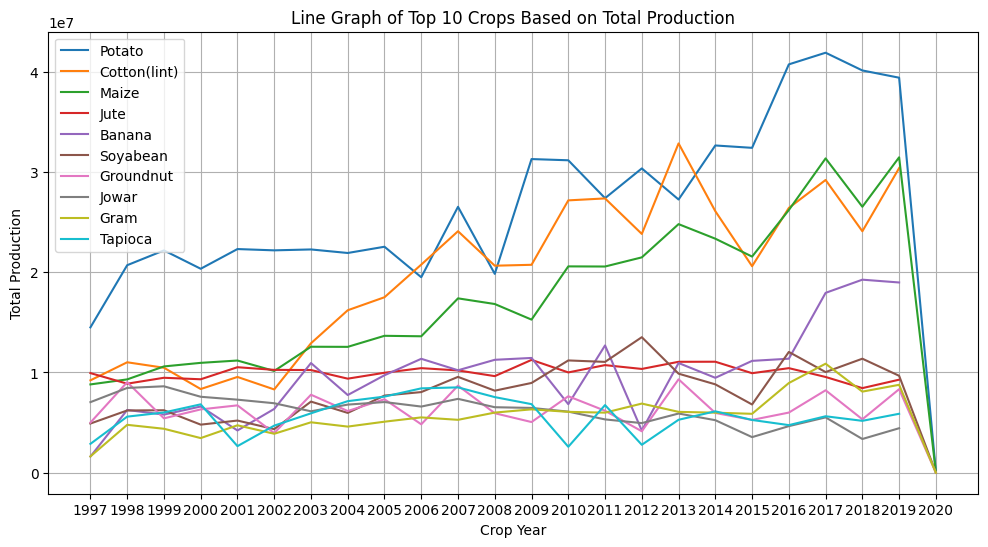

In [49]:
years = list(range(1997, 2021))
label = list(map(str, range(1997, 2021)))
crop_year_production = df.groupby(['Crop', 'Crop_Year'])['Production'].sum().reset_index()
top_14_crops = df.groupby('Crop')['Production'].sum().nlargest(14).index
top_13_crops = top_14_crops.drop('Coconut ')
top_12_crops = top_13_crops.drop('Sugarcane')
top_11_crops = top_12_crops.drop('Rice')
top_10_crops = top_11_crops.drop('Wheat')
filtered_data = crop_year_production[crop_year_production['Crop'].isin(top_10_crops)]

# Plot the time series line graph for each crop
plt.figure(figsize=(12, 6))
for crop in top_10_crops:
    crop_data = filtered_data[filtered_data['Crop'] == crop]
    plt.plot(crop_data['Crop_Year'], crop_data['Production'], label=crop)

# Set plot labels and title
plt.xlabel('Crop Year')
plt.xticks(years, label=label)
plt.ylabel('Total Production')
plt.title('Line Graph of Top 10 Crops Based on Total Production')
plt.legend()
plt.grid(True)
plt.show()

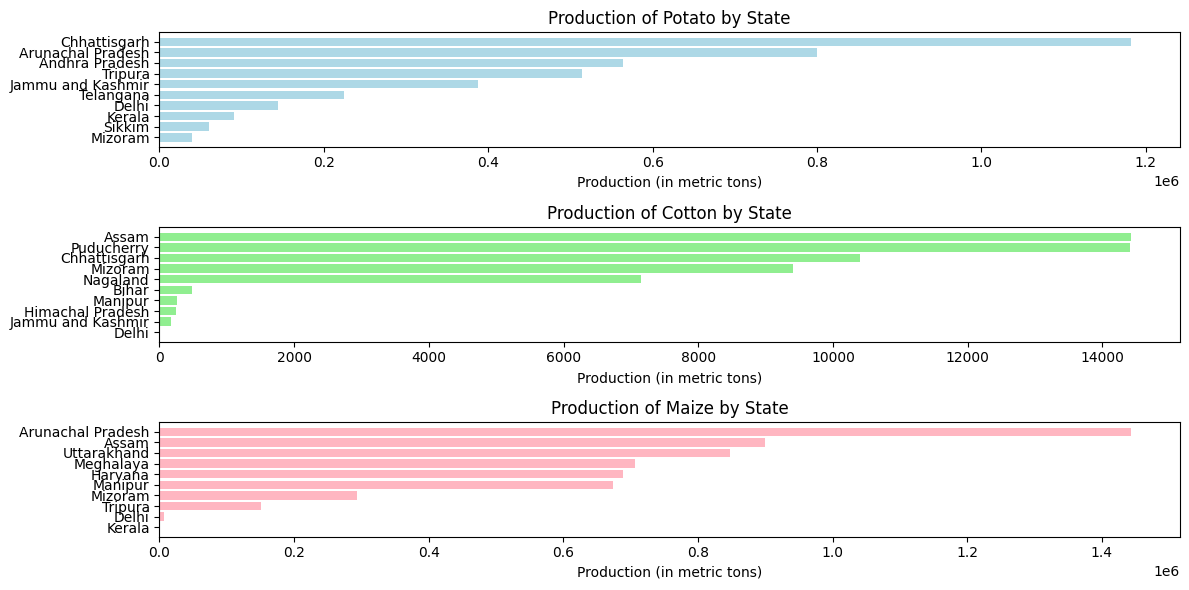

In [50]:
crop_state_production = df.groupby(['Crop', 'State'])['Production'].sum().reset_index()

# Filter DataFrame for 'Potato', 'Cotton', and 'Maize'
potato_df = crop_state_production[crop_state_production['Crop'] == 'Potato'].sort_values(by='Production', ascending=True).head(10)
cotton_df = crop_state_production[crop_state_production['Crop'] == 'Cotton(lint)'].sort_values(by='Production', ascending=True).head(10)
maize_df = crop_state_production[crop_state_production['Crop'] == 'Maize'].sort_values(by='Production', ascending=True).head(10)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 6))

# Subplot 1: potato
ax1.barh(potato_df['State'], potato_df['Production'], color='lightblue')
ax1.set_xlabel('Production (in metric tons)')
ax1.set_title('Production of Potato by State')

# Subplot 2: cotton
ax2.barh(cotton_df['State'], cotton_df['Production'], color='lightgreen')
ax2.set_xlabel('Production (in metric tons)')
ax2.set_title('Production of Cotton by State')

# Subplot 3: cotton
ax3.barh(maize_df['State'], maize_df['Production'], color='lightpink')
ax3.set_xlabel('Production (in metric tons)')
ax3.set_title('Production of Maize by State')

# Adjust layout
plt.tight_layout()
plt.show()

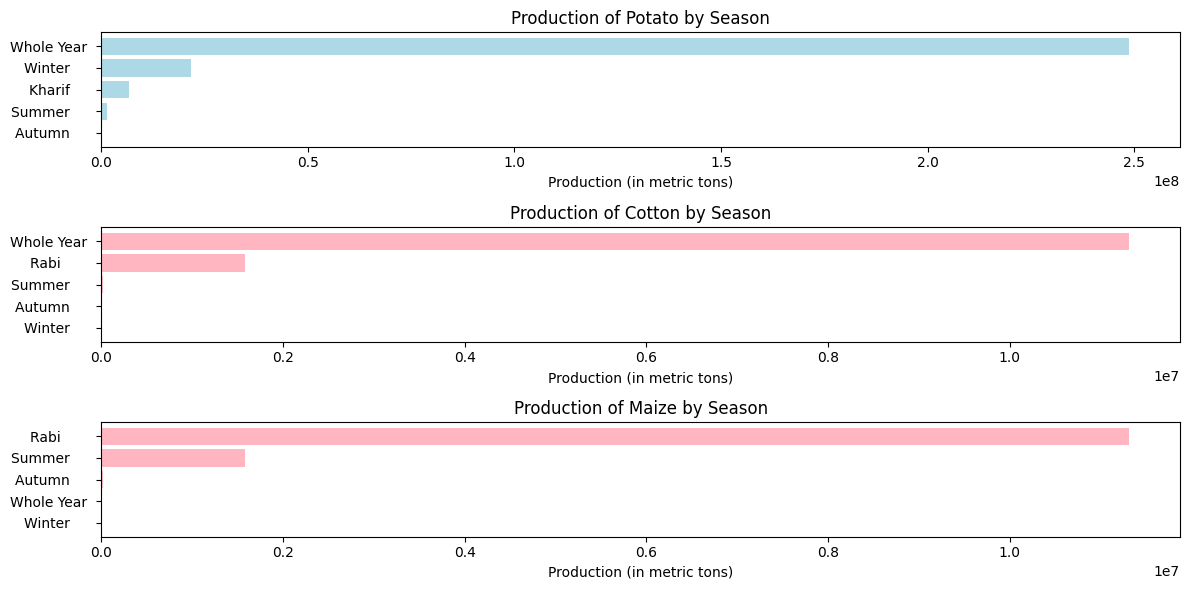

In [51]:
# best seasons for producing 'Potato', 'Cotton', and 'Maize'

crop_state_production = df.groupby(['Crop', 'Season'])['Production'].sum().reset_index()

top_potato_seasons = crop_state_production[crop_state_production['Crop'] == 'Potato'].sort_values(by='Production', ascending=True).head()
top_cotton_seasons = crop_state_production[crop_state_production['Crop'] == 'Cotton(lint)'].sort_values(by='Production', ascending=True).head()
top_maize_seasons = crop_state_production[crop_state_production['Crop'] == 'Maize'].sort_values(by='Production', ascending=True).head()

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 6))

# potato
ax1.barh(top_potato_seasons['Season'], top_potato_seasons['Production'], color='lightblue')
ax1.set_xlabel('Production (in metric tons)')
ax1.set_title('Production of Potato by Season')

# cotton
ax2.barh(top_cotton_seasons['Season'], top_cotton_seasons['Production'], color='lightpink')
ax2.set_xlabel('Production (in metric tons)')
ax2.set_title('Production of Cotton by Season')

# Maize
ax3.barh(top_maize_seasons['Season'], top_cotton_seasons['Production'], color='lightpink')
ax3.set_xlabel('Production (in metric tons)')
ax3.set_title('Production of Maize by Season')

plt.tight_layout()
plt.show()

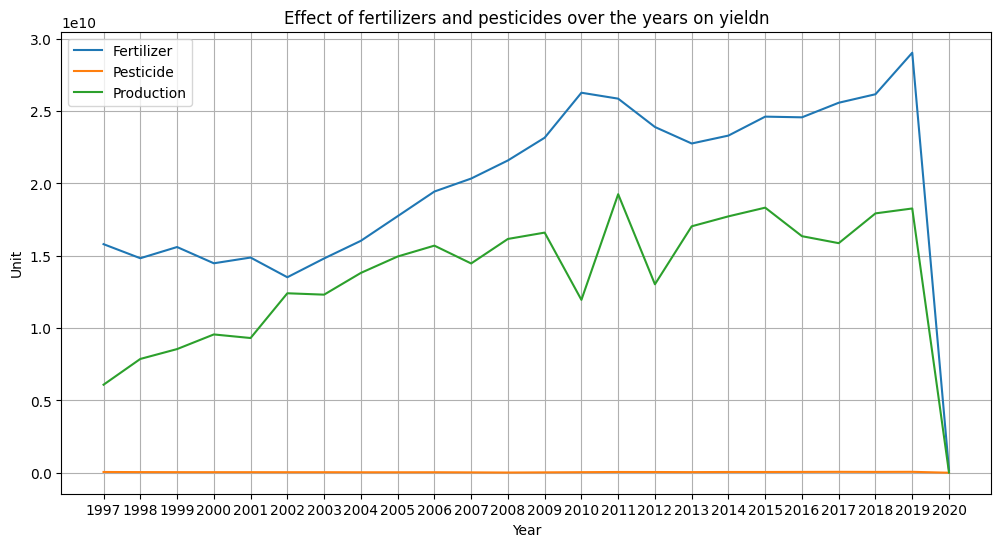

In [78]:
# A trend to find the use of fertilizers and pesticides over the years on yield

years = list(range(1997, 2021))
label = list(map(str, range(1997, 2021)))

crop_year_fertilizer = df.groupby('Crop_Year')['Fertilizer'].sum().reset_index()
crop_year_pesticide = df.groupby('Crop_Year')['Pesticide'].sum().reset_index()
crop_year_production = df.groupby('Crop_Year')['Production'].sum().reset_index()

# crop_year_fertilizer
# crop_year_pesticide
# crop_year_production

plt.figure(figsize=(12, 6))

plt.plot(crop_year_fertilizer['Crop_Year'], crop_year_fertilizer['Fertilizer'], label='Fertilizer')
plt.plot(crop_year_pesticide['Crop_Year'], crop_year_pesticide['Pesticide'], label='Pesticide')
plt.plot(crop_year_production['Crop_Year'], crop_year_production['Production'], label='Production')

# Set plot labels and title
plt.xlabel('Year')
plt.xticks(years, label=label)
plt.ylabel('Unit')
plt.legend()
plt.title('Effect of fertilizers and pesticides over the years on yieldn')
plt.grid(True)
plt.show()